In [1]:
from tasks_python_files.Task4_Reviews_dataset_common_methods import get_neg_cue_scope_named_ent, get_neg_scope_reviews_named_ent, create_dataframe_neg_cues_scope, create_df_senti_neg_count, correlation_between_variables, plot_two_columns, get_sents, get_neg_cue_scope_modified, create_dataframe_neg_cues_scope_modified, create_dataframe_neg_cues_scope_with_neg

C:\Users\vanda\anaconda3\envs\p3_6\lib\site-packages\fuzzywuzzy\fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [2]:
import pandas as pd
import matplotlib.pyplot as plt

import spacy
from spacy import displacy
import scispacy

import networkx as nx
import numpy as np

from wordcloud import WordCloud, STOPWORDS

import re
import nltk
from textblob import TextBlob 

In [3]:
df = pd.read_csv("Restaurant_Reviews.csv")

In [4]:
df = df.drop('Unnamed: 0', axis='columns')
df = df.rename(columns = {'Review':'reviews.text', 'Liked': 'reviews.rating'})

In [5]:
#remove nan from reviews.text and reviews.ratings columns (removing from only these columns as these columns are of interest for the analysis)
#df[df["reviews.text"].isna()]
df = df.dropna(subset = ['reviews.text','reviews.rating'])
df = df.reset_index()
df = df.drop('index', axis='columns')
#df = df.rename(columns = {'index':'previous_index'})

In [6]:
df_negs, avg_senti_reviews_lt = create_dataframe_neg_cues_scope(df)
#df_negs['negation_scopes']

In [7]:
neg_cues_list = list(df_negs['negation_cues'])

neg_list = []
for i in range(len(neg_cues_list)):
    for j in range(len(neg_cues_list[i])):
        neg_list.append(neg_cues_list[i][j])

In [8]:
from collections import Counter

# insert the list to the set
list_set = set(neg_list)
# convert the set to the list
unique_list = (list(list_set))

count_list = []
for i in range(len(unique_list)):
    counter_obj = Counter(neg_list)
    count_list.append(counter_obj[unique_list[i]])

In [9]:
df_a = pd.DataFrame()

df_a = df_a.assign(unique_negs = unique_list)        
df_a = df_a.assign(negs_count = count_list)

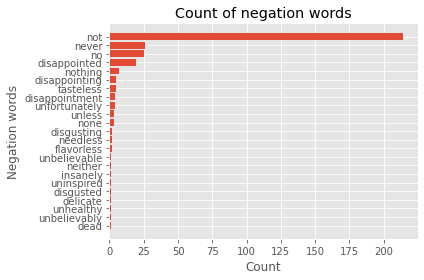

In [10]:
df_a = df_a.sort_values(by=['negs_count'])
plt.style.use('ggplot')

plt.barh(df_a['unique_negs'],df_a['negs_count'])
plt.title('Count of negation words')
plt.ylabel('Negation words')
plt.xlabel('Count')

plt.tight_layout()
plt.savefig(".\\results_pics\\"+"all_negation_words_barchart.png", dpi=500)
plt.show()

In [11]:
neg_text = " ".join(cat for cat in neg_list)

In [12]:
#scope
scopes_list = list(df_negs['negation_scopes'])

scopes = []
for i in range(len(scopes_list)):
    for j in range(len(scopes_list[i])):
        scopes.append(scopes_list[i][j])

In [13]:
def ner_ents(text):
    nlp = spacy.load("en_core_web_sm")
    doc=nlp(text)
    return [X.label_ for X in doc.ents]

ent_label=df_negs['reviews'].\
    apply(lambda x : ner_ents(x))
ent_label=[x for sub in ent_label for x in sub]

In [14]:
#ent

In [15]:
def ner(text):
    nlp = spacy.load("en_core_web_sm")
    doc=nlp(text)
    return [X.text for X in doc.ents]

ent=df_negs['reviews'].\
    apply(lambda x : ner(x))
ent=[x for sub in ent for x in sub]

In [16]:
scopes_ent= [ner(x) for x in scopes]
scopes_ent=[x for sub in scopes_ent for x in sub]

In [17]:
ner_text = ' '.join(ent)
ner_label = ' '.join(ent_label)
scope_ner_text= ' '.join(scopes_ent)

In [18]:
print(len(STOPWORDS))
# STOPWORDS.discard('not')
# STOPWORDS.discard('not')

# Creating a custom list of stopwords
#customStopwords=list(STOPWORDS) + ['less','Trump','American','politics','country']

a=STOPWORDS
b={"not", "no", "nor"}

c = a.difference(b)
print(len(c))

192
189


In [19]:
##HERE

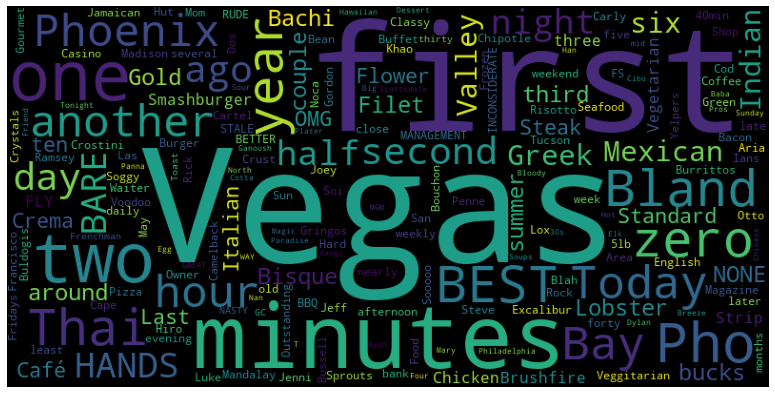

In [20]:
word_cloud_ner = WordCloud(font_step =2, stopwords = c, background_color="black",
                            collocation_threshold = 40, width=800, height=400).generate(ner_text)

plt.figure( figsize=(14,7) )
plt.axis("off")
plt.imshow(word_cloud_ner)
plt.savefig("wordCloud_all_ner_restaurant_new.png")

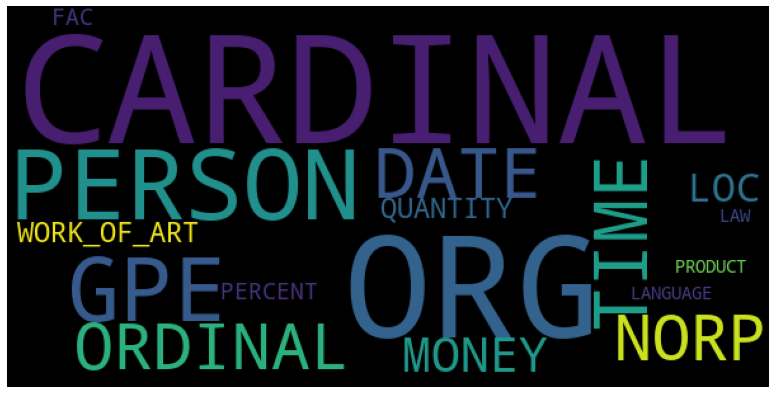

In [21]:
word_cloud_ner_label = WordCloud(font_step =2, stopwords = c, background_color="black",
                            collocations= False, width=600, height=300).generate(ner_label)

plt.figure( figsize=(14,7) )
plt.axis("off")
plt.imshow(word_cloud_ner_label)
plt.savefig("wordCloud_all_ner_label_restaurant.png")

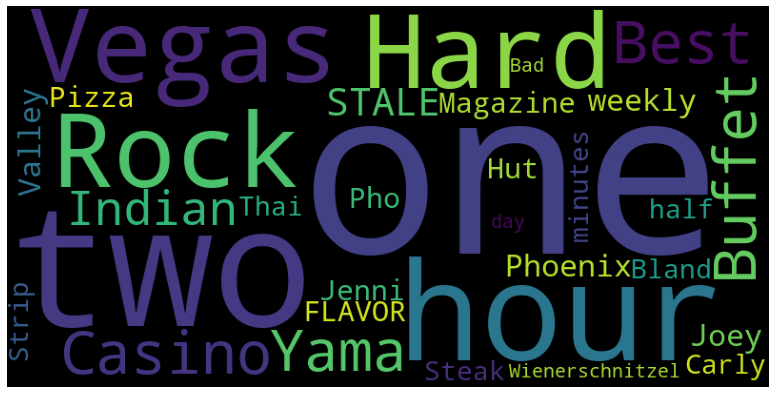

In [22]:
word_cloud_scope_ner_text = WordCloud(font_step =2, stopwords = c, background_color="black",
                            collocations= False, width=800, height=400).generate(scope_ner_text)

plt.figure( figsize=(14,7) )
plt.axis("off")
plt.imshow(word_cloud_scope_ner_text)
plt.savefig("./results_pics"+"wordCloud_all_scope_ner_text_restaurant.png")

In [23]:
#psuedo code algorithm

In [24]:
# from textblob import TextBlob
# reviews = df_negs["reviews"]
# NewNounList=[]
# for i in range(len(reviews)):
    
#     # Converting the sample text to a blob
#     SampleTextInBlobFormat = TextBlob(reviews[i])

#     # Finding the noun phrases (important keywords combination) in the text
#     # This can help to find out what entities are being talked about in the given text
#     NounPhrases=SampleTextInBlobFormat.noun_phrases

#     # Creating an empty list to hold new values
#     # combining the noun phrases using underscore to visualize it as wordcloud
    
#     for words in NounPhrases:
#         NewNounList.append(words.replace(" ", "_"))
    
# # Converting list into a string to plot wordcloud
# NewNounString=' '.join(NewNounList)
# print('##### Important word combinations ####')
# print(NewNounString)

In [25]:
def decontract(phrase):
    phrase = re.sub(r"[c|C]an\'t", "can not", phrase)
    phrase = re.sub(r"[w|W]on\'t", "will not", phrase)
    
    phrase = re.sub(r"n\'t", " not", phrase)
    return phrase

In [26]:
def get_nn_phrases_txtblob(sentence):
    blob = TextBlob(sentence)
    nn_words = [n for n,t in blob.tags if t == 'NN']
    return list(blob.noun_phrases), nn_words

if there are two or more than two words in noun phrase then join the words with "_"

In [27]:
nn_phrases_all_reviews=[]
for review in df_negs["reviews"]:
    nn_phrases, nn_words = get_nn_phrases_txtblob(review) 
    nn_phrases_all_reviews.extend(nn_phrases)

nn_phrases_all_reviews = [re.sub("\s", "_", nnp) for nnp in nn_phrases_all_reviews]
nn_phrases_txt = " ".join(cat for cat in nn_phrases_all_reviews)


**********************************************************************
  Resource averaged_perceptron_tagger not found.
  Please use the NLTK Downloader to obtain the resource:

  >>> import nltk
  >>> nltk.download('averaged_perceptron_tagger')
  
  For more information see: https://www.nltk.org/data.html

  Attempted to load taggers/averaged_perceptron_tagger/averaged_perceptron_tagger.pickle

  Searched in:
    - 'C:\\Users\\vanda/nltk_data'
    - 'C:\\Users\\vanda\\anaconda3\\envs\\p3_6\\nltk_data'
    - 'C:\\Users\\vanda\\anaconda3\\envs\\p3_6\\share\\nltk_data'
    - 'C:\\Users\\vanda\\anaconda3\\envs\\p3_6\\lib\\nltk_data'
    - 'C:\\Users\\vanda\\AppData\\Roaming\\nltk_data'
    - 'C:\\nltk_data'
    - 'D:\\nltk_data'
    - 'E:\\nltk_data'
**********************************************************************



MissingCorpusError: 
Looks like you are missing some required data for this feature.

To download the necessary data, simply run

    python -m textblob.download_corpora

or use the NLTK downloader to download the missing data: http://nltk.org/data.html
If this doesn't fix the problem, file an issue at https://github.com/sloria/TextBlob/issues.


In [ ]:
## https://stackoverflow.com/questions/33587667/extracting-all-nouns-from-a-text-file-using-nltk
# print([w for (w, pos) in TextBlob(txt).pos_tags if pos[0] == 'N'])
# print([word for (word, pos) in nltk.pos_tag(nltk.word_tokenize(txt)) if pos[0] == 'N'])

In [ ]:
#pre process reviews
#re.sub("[-:;()\[\]]","",review)

In [ ]:
word_cloud_scope_ner_text = WordCloud(font_step =2, stopwords = c, background_color="black",
                            collocations= False, width=800, height=400).generate(nn_phrases_txt)

plt.figure( figsize=(14,7) )
plt.axis("off")
plt.imshow(word_cloud_scope_ner_text)
plt.savefig("./results_pics"+"wordCloud_nnp_reviews_restaurant.png")

In [ ]:
nn_phrases_all_scopes=[]
for scope in scopes:
    nn_phrases, nn_words = get_nn_phrases_txtblob(scope) 
    nn_phrases_all_scopes.extend(nn_phrases)

nn_phrases_all_scopes = [re.sub("\s", "_", nnp) for nnp in nn_phrases_all_scopes]
nn_phrases_scopes_txt = " ".join(cat for cat in nn_phrases_all_scopes)

In [ ]:
nn_phrases_scopes_txt

In [ ]:
word_cloud_scope_ner_text = WordCloud(font_step =2, stopwords = c, background_color="black",
                            collocations= False, width=800, height=400).generate(nn_phrases_scopes_txt)

plt.figure( figsize=(14,7) )
plt.axis("off")
plt.imshow(word_cloud_scope_ner_text)
plt.savefig("wordCloud_scopes_nnp_restaurant.png")

In [ ]:
df_negs2, avg_senti_reviews_lt2 = create_dataframe_neg_cues_scope_with_neg(df)

In [ ]:
#break break

In [ ]:
#scope
neg_scopes_list = list(df_negs2['negation_scopes'])

neg_scopes = []
for i in range(len(neg_scopes_list)):
    for j in range(len(neg_scopes_list[i])):
        neg_scopes.append(neg_scopes_list[i][j])

In [ ]:
#neg_scopes

In [ ]:
neg_scope_text = " ".join(cat for cat in neg_scopes)

In [ ]:
word_cloud = WordCloud( stopwords = c, collocations = False, background_color="black", width= 800, height = 400).generate(neg_text)

In [ ]:
plt.figure(figsize=(10,5))
plt.axis("off")
plt.imshow(word_cloud)
plt.savefig("wordCloud_all_negations_restaurant1.png")

In [ ]:
#bigram by using collocation_threshold
word_cloud_scope = WordCloud(font_step =2, stopwords = c, background_color="black",
                            collocation_threshold = 3, width=800, height=400).generate(neg_scope_text)

plt.figure( figsize=(14,7) )
plt.axis("off")
plt.imshow(word_cloud_scope)
plt.savefig("wordCloud_all_negs_scope_restaurant1.png")

In [ ]:
#bigram using nltk's BigramCollocationFinder
import nltk
from nltk.tokenize import word_tokenize
from nltk.collocations import BigramAssocMeasures, BigramCollocationFinder, TrigramAssocMeasures, TrigramCollocationFinder
 
from operator import itemgetter

#remove stopwords from scopes
neg_scope_lt = []
for sent in neg_scopes:
    tk_lt = word_tokenize(sent)
    s = [tk for tk in tk_lt if tk not in c]
    neg_scope_lt.append(" ".join(cat for cat in s))

#get list of words from neg_scope_lt(which is list of strings(neg scopes))
text_content = []
for sent in neg_scope_lt:
    lt = word_tokenize(sent)
    for t in lt:
        text_content.append(t)

#remove any special character if any like $ sign for money bcz I didnt remove it and ' this from tokens like "'ve"
text_content = [ re.sub(r"[^a-zA-Z0-9]","",txt) for txt in text_content]

#do lowercase to all words as some words are in all caps
#remove empty tokens
text_content = [ txt.lower() for txt in text_content if txt != ""]

In [ ]:
# setup and score the bigrams using the raw frequency.
finder = BigramCollocationFinder.from_words(text_content)
bigram_measures = BigramAssocMeasures()
scored = finder.score_ngrams(bigram_measures.raw_freq)

# By default finder.score_ngrams is sorted, however don't rely on this default behavior.
# Sort highest to lowest based on the score.
scoredList = sorted(scored, key=itemgetter(1), reverse=True)


word_dict = {}
listLen = len(scoredList)
# Get the bigram and make a contiguous string for the dictionary key.
# Set the key to the scored value.
for i in range(listLen):
    word_dict['_'.join(scoredList[i][0])] = scoredList[i][1]

# Set word cloud params and instantiate the word cloud.
# The height and width only affect the output image file.
wordCloud = WordCloud( height=400, width=800)
 
wordCloud.generate_from_frequencies(word_dict)

plt.figure( figsize=(14,7) )
plt.title('Most frequently occurring bigrams connected with an underscore_')
plt.imshow(wordCloud, interpolation='bilinear')
plt.axis("off")
plt.show()
 
wordCloud.to_file("WordCloud_Bigrams_frequent_words.png")

In [ ]:
#trigram

In [ ]:
# setup and score the bigrams using the raw frequency.
finder = TrigramCollocationFinder.from_words(text_content)
trigram_measures = TrigramAssocMeasures()
scored = finder.score_ngrams(trigram_measures.raw_freq)

# By default finder.score_ngrams is sorted, however don't rely on this default behavior.
# Sort highest to lowest based on the score.
scoredList = sorted(scored, key=itemgetter(1), reverse=True)


word_dict = {}
listLen = len(scoredList)
# Get the bigram and make a contiguous string for the dictionary key.
# Set the key to the scored value.
for i in range(listLen):
    word_dict['_'.join(scoredList[i][0])] = scoredList[i][1]

# Set word cloud params and instantiate the word cloud.
# The height and width only affect the output image file.
wordCloud = WordCloud( height=700, width=1400)
 
wordCloud.generate_from_frequencies(word_dict)

plt.figure( figsize=(16,8) )
plt.title('Most frequently occurring bigrams connected with an underscore_')
plt.imshow(wordCloud, interpolation='bilinear')
plt.axis("off")
plt.show()
 
wordCloud.to_file("WordCloud_Trigrams_frequent_words.png")

In [ ]:
##BARCHARTS
#modified df, negations, affix, suffix bar charts

In [ ]:
df_negs_modified, avg_senti_scores  = create_dataframe_neg_cues_scope_modified(df)

In [ ]:
neg_cues_list1 = list(df_negs_modified['negation_cues'])
neg_list1 = []
for i in range(len(neg_cues_list1)):
    for j in range(len(neg_cues_list1[i])):
        neg_list1.append(neg_cues_list1[i][j])

In [ ]:
len(neg_list1)

In [ ]:
neg_affix_cues_list = list(df_negs_modified['negation_affix_cues'])
neg_affix_list = []
for i in range(len(neg_affix_cues_list)):
    for j in range(len(neg_affix_cues_list[i])):
        neg_affix_list.append(neg_affix_cues_list[i][j])

In [ ]:
len(neg_affix_list)

In [ ]:
neg_suffix_cues_list = list(df_negs_modified['negation_suffix_cues'])
neg_suffix_list = []
for i in range(len(neg_suffix_cues_list)):
    for j in range(len(neg_suffix_cues_list[i])):
        neg_suffix_list.append(neg_suffix_cues_list[i][j])

In [ ]:
len(neg_suffix_list)

In [ ]:
from collections import Counter

# insert the list to the set
list_set1 = set(neg_list1)
# convert the set to the list
unique_list1 = (list(list_set1))

count_list1 = []
for i in range(len(unique_list1)):
    counter_obj = Counter(neg_list1)
    count_list1.append(counter_obj[unique_list1[i]])

In [ ]:
# insert the list to the set
affix_list_set = set(neg_affix_list)
# convert the set to the list
unique_affix_list = (list(affix_list_set))

count_affix_list = []
for i in range(len(unique_affix_list)):
    counter_obj = Counter(neg_affix_list)
    count_affix_list.append(counter_obj[unique_affix_list[i]])

In [ ]:
# insert the list to the set
suffix_list_set = set(neg_suffix_list)
# convert the set to the list
unique_suffix_list = (list(suffix_list_set))

count_suffix_list = []
for i in range(len(unique_suffix_list)):
    counter_obj = Counter(neg_suffix_list)
    count_suffix_list.append(counter_obj[unique_suffix_list[i]])

In [ ]:
df_1 = pd.DataFrame()

df_1 = df_1.assign(unique_negs1 = unique_list1)        
df_1 = df_1.assign(negs_count1 = count_list1)


df_2 = pd.DataFrame()
df_2 = df_2.assign(unique_affix_negs = unique_affix_list)        
df_2 = df_2.assign(negs_affix_count = count_affix_list) 


df_3 = pd.DataFrame()
df_3 = df_3.assign(unique_suffix_negs = unique_suffix_list)        
df_3 = df_3.assign(negs_suffix_count = count_suffix_list) 

In [ ]:
df_3

In [ ]:
df_1 = df_1.sort_values(by=['negs_count1'])
plt.style.use('ggplot')

plt.barh(df_1['unique_negs1'],df_1['negs_count1'])
plt.title('Count of negation words')
plt.ylabel('Negation words')
plt.xlabel('Count')
plt.tight_layout()
plt.savefig(".\\results_pics\\"+"negation_words_barchart_p1.png", dpi=500)
plt.show()

In [ ]:
df_2 = df_2.sort_values(by=['negs_affix_count'])
plt.style.use('ggplot')

plt.barh(df_2['unique_affix_negs'],df_2['negs_affix_count'])
plt.title('Count of negative affixed words')
plt.ylabel('Negative words')
plt.xlabel('Count')
plt.tight_layout()
plt.savefig(".\\results_pics\\"+"affix_negative_words_barchart.png", dpi=500)
plt.show()

In [ ]:
df_3 = df_3.sort_values(by=['negs_suffix_count'])
plt.style.use('ggplot')

plt.barh(df_3['unique_suffix_negs'],df_3['negs_suffix_count'])
plt.title('Count of negative suffixed words')
plt.ylabel('Negative words')
plt.xlabel('Count')
plt.tight_layout()
plt.savefig(".\\results_pics\\"+"suffix_negative_words_barchart.png", dpi=500)
plt.show()

In [ ]:
df_negs_modified.head(3)

In [ ]:
ne_l = list(df_negs_modified['named_entities'])
ne_lt = []
for i in range(len(ne_l)):
    for j in range(len(ne_l[i])):
        ne_lt.append(ne_l[i][j])

In [ ]:
ne_text = " ".join(re.sub(r'\([^)]*\)', '', cat) for cat in ne_lt)
word_cloud = WordCloud(collocations = False, background_color="white", width=5000, height=2000,max_words=500).generate(ne_text)

In [ ]:
plt.axis("off")
plt.imshow(word_cloud)

In [ ]:
#cat.replace('(','').replace(')', '')